# Workshop - 3: Superstore EDA
This notebook will walk through EDA of Superstore Data.

# Author: Vedant P. Kathe

# We start with importing necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Next we import the dataset to work in the jupyter notebook.

In [2]:
df=pd.read_csv("C:/Users/vedant kathe/Downloads/SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Basic Description of Data

In [3]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Checking for missing values

In [4]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

We can see that there are no missing values in out dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


# Let us first focus on ship mode classes.

In [6]:
import seaborn as sns

# Plotting shipment classes on basis of their counts.

C:\Users\vedant kathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

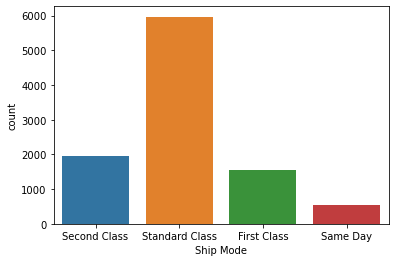

In [7]:
sns.countplot(df['Ship Mode'])

Maximum products are from the Standard Class

# Now let us focus on customer segments.

C:\Users\vedant kathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Segment', ylabel='count'>

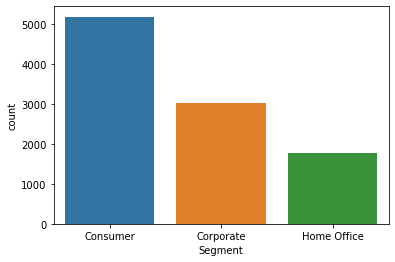

In [8]:
sns.countplot(df['Segment'])

Maximum products are sold in customer segment

All the products present in the dataset are from US.

# Quantity ranges for products ordered.

<AxesSubplot:xlabel='Quantity', ylabel='Count'>

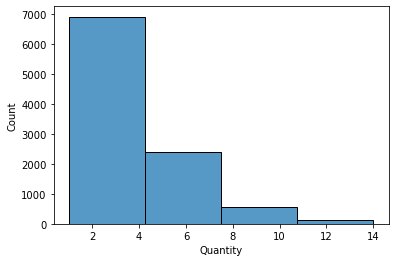

In [30]:
sns.histplot(data=df,x='Quantity',bins=4)

# Discount ranges histogram

<AxesSubplot:xlabel='Discount', ylabel='Count'>

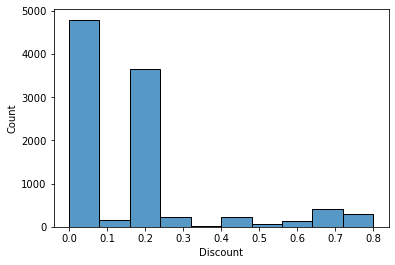

In [34]:
sns.histplot(data=df,x='Discount',bins=10)

In [10]:
df['City'].nunique()

531

# Top Cities

In [11]:
df['City'].value_counts()[0:8]

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
Name: City, dtype: int64

In [12]:
df['City']

0             Henderson
1             Henderson
2           Los Angeles
3       Fort Lauderdale
4       Fort Lauderdale
             ...       
9989              Miami
9990         Costa Mesa
9991         Costa Mesa
9992         Costa Mesa
9993        Westminster
Name: City, Length: 9994, dtype: object

# Pie Diagram for most prominent cities.

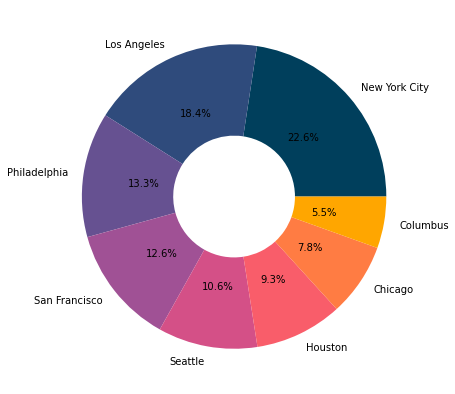

In [13]:
fig1=plt.figure(figsize=(10,7))
mycolors=['#003f5c',
'#2f4b7c',
'#665191',
'#a05195',
'#d45087',
'#f95d6a',
'#ff7c43',
'#ffa600']
fig1=plt.pie(x=df['City'].value_counts()[0:8],labels=df['City'].value_counts()[0:8].keys(),autopct="%.1f%%",colors=mycolors,wedgeprops=dict(width=0.6))

# Most profitable category

<AxesSubplot:xlabel='Category', ylabel='Profit'>

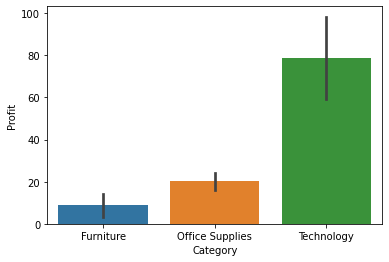

In [37]:
sns.barplot(data=df,x='Category',y='Profit')

# Depicting sales and profit for top 10 States of US.

In [14]:
aar={}
for locs,locss in zip(df['State'],df['Sales']):
    if locs not in aar:
        aar[locs]=locss    
    else:
        aar[locs]+=locss
keyh= sorted(aar.keys(),reverse=True)[:10]        
valuesh=sorted(aar.values(),reverse=True)[:10]  

In [15]:
keyh

['Wyoming',
 'Wisconsin',
 'West Virginia',
 'Washington',
 'Virginia',
 'Vermont',
 'Utah',
 'Texas',
 'Tennessee',
 'South Dakota']

In [16]:
valuesh

[457687.631500001,
 310876.2709999998,
 170188.04580000005,
 138641.26999999993,
 116511.91400000003,
 89473.708,
 80166.10099999985,
 78258.13599999993,
 76269.61400000002,
 70636.71999999999]

Text(0, 0.5, 'Top States')

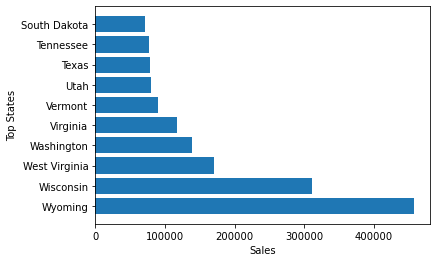

In [17]:
barlist=dict(zip(keyh,valuesh))
plt.barh(list(barlist.keys()), barlist.values())
plt.xlabel("Sales")
plt.ylabel("Top States")

Text(0, 0.5, 'Top States')

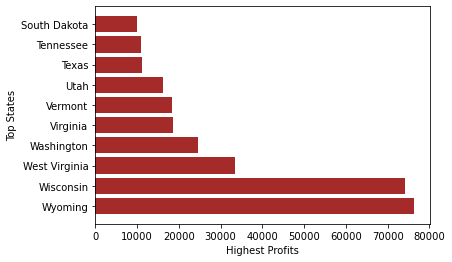

In [18]:
ar={}
for key,values in zip(df['State'],df['Profit']):
    if key not in ar:
        ar[key]=values   
    else:
        ar[key]+=values
state= sorted(ar.keys(),reverse=True)[:10]        
profits=sorted(ar.values(),reverse=True)[:10]  
barlists=dict(zip(state,profits))
plt.barh(list(barlists.keys()), barlists.values(),color='brown')
plt.xlabel("Highest Profits")
plt.ylabel("Top States")

C:\Users\vedant kathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

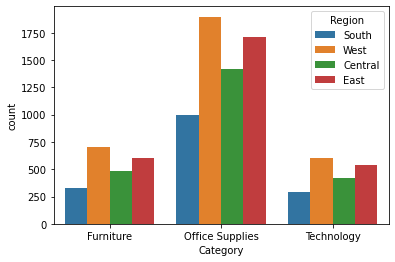

In [19]:
sns.countplot(df['Category'],hue=df['Region'])

# States with Highest Losses

Text(0, 0.5, 'Worst Affected States')

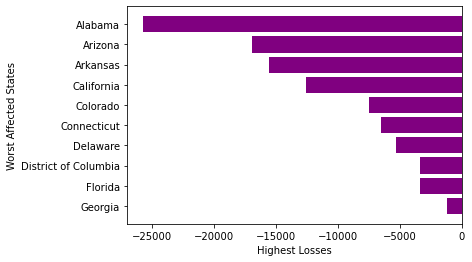

In [20]:
ar={}
for key,values in zip(df['State'],df['Profit']):
    if key not in ar:
        ar[key]=values   
    else:
        ar[key]+=values
state= sorted(ar.keys(),reverse=True)[-10:]        
profits=sorted(ar.values(),reverse=True)[-10:]  
barlists=dict(zip(state,profits))
plt.barh(list(barlists.keys()), barlists.values(),color='purple')
plt.xlabel("Highest Losses")
plt.ylabel("Worst Affected States")

# Correlation heatmap

<AxesSubplot:>

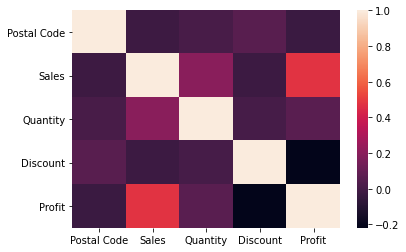

In [21]:
sns.heatmap(df.corr())

# Finally we have the Pairplot.

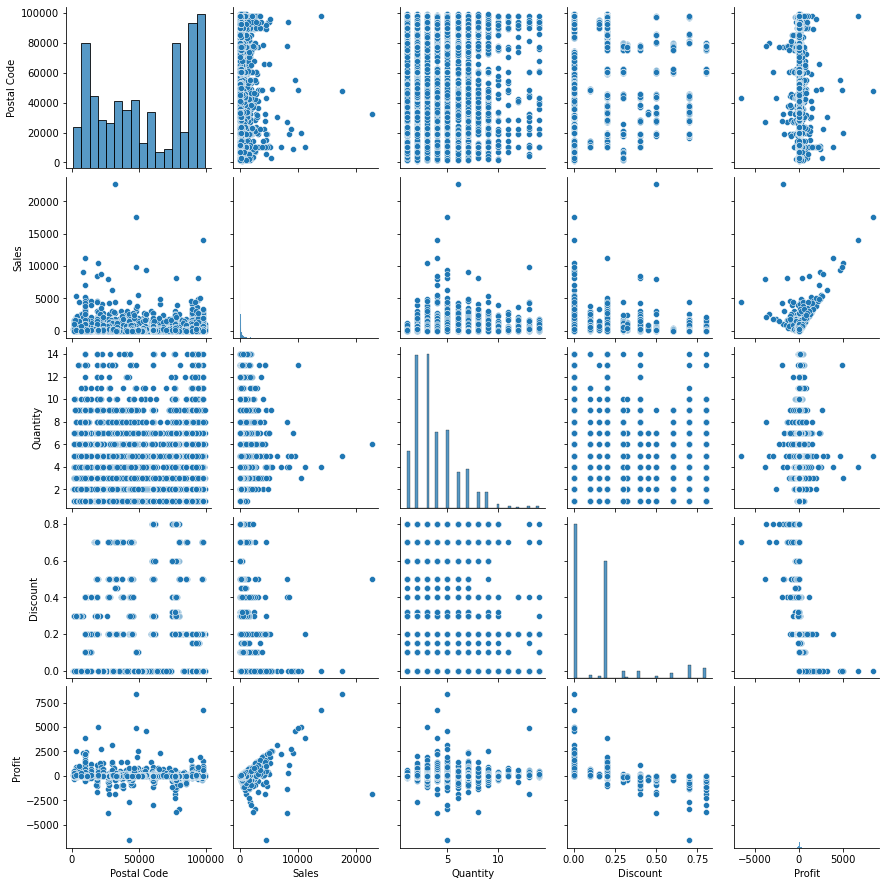

In [22]:
sns.pairplot(df)